In [1]:
from pandas import Series, DataFrame
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import pylab
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Task A

In [2]:
#read in data
scores = pd.read_csv('assignment 3 sentiment scores.csv')
scores.head()

,ES,LS,RX,A8,A6,3series,5series,7series,XJ,Sclass
0,NaN,NaN,4.0,3.0,NaN,NaN,NaN,5.0,2.0,1.0
1,NaN,NaN,3.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
2,NaN,4.0,NaN,NaN,NaN,3.0,NaN,3.0,NaN,3.0
3,NaN,2.0,NaN,2.0,NaN,NaN,NaN,2.0,4.0,2.0
4,NaN,3.0,3.0,NaN,NaN,NaN,2.0,NaN,NaN,3.0


In [3]:
#initialize function to calculate directional switching

def diff_func(a,b):
    #find rows where a and b are directly compared
    filtered = scores[scores[a].notnull()]
    filtered = filtered[filtered[b].notnull()]
    
    #find the link weight, using Dichotomic-link graph formula from slides
    diff = sum(filtered[a]-filtered[b])/len(filtered)
    
    #determine direction of link, and return appropriate tuple
    if diff>0:
        #a has more positive sentiment when compared to b
        return (a, b, diff)
    elif diff<0:
        #b has more positive sentiment when compared to a
        return (b, a, -diff)
    else:
        #a and b have the same average sentiment when compared
        return

In [4]:
#cartesian product for unique directional tuples
#each tuple (a, b, weight) indicates that, when a and b are compared, the average sentiment is directed from b to a

edge_set = set()
for i in range(len(scores.columns)):
    for j in range(i+1, len(scores.columns)):
        edge_set.add(diff_func(scores.columns[i], scores.columns[j]))
        
print edge_set

set([('LS', 'Sclass', 0.15333333333333332), ('LS', 'A6', 1.1666666666666667), ('3series', '7series', 0.1), ('RX', 'XJ', 2.0), ('RX', 'Sclass', 1.6666666666666667), ('A8', '3series', 1.1428571428571428), ('LS', 'ES', 0.3939393939393939), ('RX', '7series', 2.8), ('A8', '5series', 0.8333333333333334), ('A6', 'XJ', 1.0), ('LS', '3series', 0.75), ('LS', 'A8', 0.17045454545454544), ('ES', '7series', 0.36363636363636365), ('A6', '3series', 0.14285714285714285), ('5series', 'A6', 0.5), ('LS', 'RX', 0.375), ('A8', '7series', 0.075), ('ES', 'A6', 1.4), ('LS', '7series', 0.34545454545454546), ('Sclass', '7series', 0.2391304347826087), ('XJ', '7series', 0.5714285714285714), ('7series', 'A6', 1.6666666666666667), ('XJ', 'LS', 0.2), ('XJ', '3series', 3.0), ('RX', 'A6', 3.6666666666666665), ('ES', 'A8', 0.18181818181818182), ('RX', '5series', 3.6), ('ES', 'Sclass', 0.4444444444444444), ('Sclass', 'XJ', 0.375), ('RX', '3series', 2.6666666666666665), ('ES', '5series', 1.75), ('5series', 'LS', 0.1904761

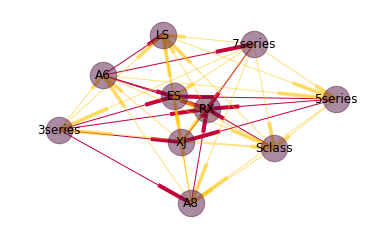

In [5]:
#make the ugly graph AKA option 1

G = nx.MultiDiGraph()

edge_set.discard(None)
for item in edge_set:
    G.add_edge(item[1], item[0], weight=item[2])

elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >1]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=1]

pos=nx.spring_layout(G)

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='#581845', alpha=0.5)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=1, edge_color='#C70039')
nx.draw_networkx_edges(G, pos, edgelist=esmall, width=1, alpha=0.5, edge_color='#FFC300')

# labels
nx.draw_networkx_labels(G, pos, font_size=12)

plt.axis('off')
plt.show() # display

/anaconda/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/anaconda/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/anaconda/lib/python2.7/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


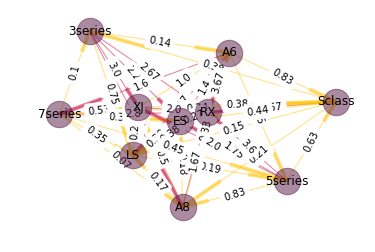

In [6]:
#even uglier graph AKA option 2

G = nx.DiGraph()

for item in edge_set:
    G.add_edge(item[1], item[0], weight=round(item[2],2))

red_edges = [(tup[1], tup[0]) for tup in edge_set if tup[2]>1]
edge_colors = ['#FFC300' if not edge in red_edges else '#C70039' for edge in G.edges()]

pos=nx.spring_layout(G)

edge_labels=dict([((u,v,),d['weight']) for u,v,d in G.edges(data=True)])

nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw(G,pos, node_size=700, node_color='#581845', alpha=0.5, edge_color=edge_colors)

# labels
nx.draw_networkx_labels(G, pos, font_size=12)

plt.axis('off')
plt.show()

## Task B

In [7]:
models = ['A6','A8','3series','5series','7series','XJ','ES','LS','RX','Sclass']
sales = [20000,12000,220000,60000,14000,6600,135000,30000,120000,25000]
data = pd.DataFrame({
    'Model':models,
    'Sales':sales
})

data.sort_values('Sales',ascending=False,inplace=True)
data.set_index('Model', inplace=True)
data

,Sales
Model,
3series,220000
ES,135000
RX,120000
5series,60000
LS,30000
Sclass,25000
A6,20000
7series,14000
A8,12000


#### Notes:
Convert the NetworkX multigraph to a regular graph to run page rank.  

Link: https://stackoverflow.com/questions/28560876/is-there-a-way-to-run-pagerank-algorithm-on-networkxs-multigraph

In [8]:
H = nx.Graph()
for u,v,d in G.edges(data=True):
    w = d['weight']
    if H.has_edge(u,v):
        H[u][v]['weight'] += w
    else:
        H.add_edge(u,v,weight=w)

### Weighted Network Graph

In [9]:
w_ng = nx.pagerank(H)
w_ng

{'3series': 0.11785983099161096,
 '5series': 0.1118399560554508,
 '7series': 0.07835174761424891,
 'A6': 0.1212702813830892,
 'A8': 0.06384818582345443,
 'ES': 0.083873379861035,
 'LS': 0.051584713126335384,
 'RX': 0.20065576470465735,
 'Sclass': 0.06238278738529829,
 'XJ': 0.10833335305481956}

In [10]:
data['w_ng']=pd.Series(w_ng)
data

,Sales,w_ng
Model,,
3series,220000,0.117860
ES,135000,0.083873
RX,120000,0.200656
5series,60000,0.111840
LS,30000,0.051585
Sclass,25000,0.062383
A6,20000,0.121270
7series,14000,0.078352
A8,12000,0.063848


##### Correlation Coefficient 

In [11]:
import numpy as np
## Extract values from the pandas dataframe and the dictionary. 
np.corrcoef(data['w_ng'],data['Sales'])[0,1]

0.42809040071415633

### Unweighted Network Graph

In [12]:
un_ng = nx.pagerank(H,weight='None')
un_ng

{'3series': 0.09392145882928798,
 '5series': 0.09392145882928797,
 '7series': 0.10405236078047467,
 'A6': 0.10405236078047467,
 'A8': 0.10405236078047467,
 'ES': 0.09392145882928798,
 'LS': 0.10405236078047467,
 'RX': 0.10405236078047467,
 'Sclass': 0.10405236078047467,
 'XJ': 0.09392145882928798}

In [13]:
data['un_ng']=pd.Series(un_ng)
data

,Sales,w_ng,un_ng
Model,,,
3series,220000,0.117860,0.093921
ES,135000,0.083873,0.093921
RX,120000,0.200656,0.104052
5series,60000,0.111840,0.093921
LS,30000,0.051585,0.104052
Sclass,25000,0.062383,0.104052
A6,20000,0.121270,0.104052
7series,14000,0.078352,0.104052
A8,12000,0.063848,0.104052


##### Correlation Coefficient 

In [14]:
np.corrcoef(data['un_ng'],data['Sales'])[0,1]

-0.49721639483409935

### Task C

In [15]:
sent_df = pd.read_csv('Assignment 3 Sentiment Scores.csv')
sent_df.head()

,ES,LS,RX,A8,A6,3series,5series,7series,XJ,Sclass
0,NaN,NaN,4.0,3.0,NaN,NaN,NaN,5.0,2.0,1.0
1,NaN,NaN,3.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
2,NaN,4.0,NaN,NaN,NaN,3.0,NaN,3.0,NaN,3.0
3,NaN,2.0,NaN,2.0,NaN,NaN,NaN,2.0,4.0,2.0
4,NaN,3.0,3.0,NaN,NaN,NaN,2.0,NaN,NaN,3.0


In [16]:
def sentiment_review(review, brand_list):
    import re 
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    sid = SentimentIntensityAnalyzer()
    sent_score_fin = {}
    review = re.sub("\"", "", review)
    review = re.sub("\$+", " ", review)
    for item in brand_list:
        iter = re.finditer(item, review)
        if iter:
            sentiment = []
            for m in iter:
                sentence = review[max(0, m.start(0)-70):min((m.start(0) + len(item)+70), len(review))]
                ss = sid.polarity_scores(str(sentence))
                sentiment.append(ss['compound'])
            if sentiment:
                sent_score_fin[item] = np.mean(sentiment)
            else:
                sent_score_fin[item] = np.nan
    return sent_score_fin

In [17]:
def sentiment_score(reviews_data, brand_list):
    sent_scores = {}
    for item in brand_list:
        sent_scores[item] = list()
    for review_id in range(0, len(reviews_data)):
        sent_values = sentiment_review(reviews_data.iloc[review_id, 0], brand_list)
        for item in brand_list:
            sent_scores[item].append(sent_values[item])
    fin = pd.DataFrame.from_dict(sent_scores, orient='columns')
    fin.to_csv('Sentiment_Scores.csv', index=False)
    return sent_scores

In [18]:

def form_network(edge_list):
    
    import networkx as nx
    import pylab 
    directed_graph = nx.DiGraph()
    directed_graph.add_weighted_edges_from(edge_list, weight = 'weight')
    nx.draw(directed_graph)
    pylab.show()
    
    pagerank_unweighted = nx.pagerank(directed_graph, alpha=0.99, weight=1)
    
    print(pagerank_unweighted)
    print(len(pagerank_unweighted))
    return pagerank_unweighted 

In [19]:

def create_edges(sent_scores):
    
    edge_list = []
    brand_list = list(sent_scores.keys())
    for x in range(0, len(brand_list)):
        for y in range(x+1, len(brand_list)):
            positive_sent = []
            negative_sent = []
            for i in range(0, len(sent_scores[brand_list[0]])):
                sent_x = sent_scores[brand_list[x]][i]
                sent_y = sent_scores[brand_list[y]][i]
                if ((not(np.isnan(sent_x))) & (not(np.isnan(sent_x)))):
                    edge_weight = sent_x - sent_y
                    if edge_weight >=0:
                        positive_sent.append(edge_weight)
                    else:
                        negative_sent.append(edge_weight)
            if len(positive_sent) >0:
                edge_list.append([brand_list[x],brand_list[y],np.mean(positive_sent)])
            if len(negative_sent) >0:
                edge_list.append([brand_list[x],brand_list[y],abs(np.mean(negative_sent))])
    return edge_list

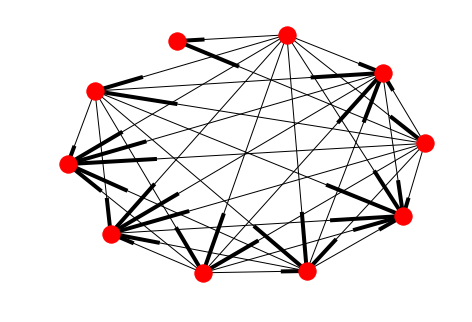

{'XJ': 0.046521214619178665, '7series': 0.05163865158013185, 'Sclass': 0.0580290201089569, 'RX': 0.0580290201089569, '5series': 0.06760386467545898, 'A6': 0.08098939586726214, 'A8': 0.10103408393050282, '3series': 0.13437492038960747, 'ES': 0.13437492038960747, 'LS': 0.26740490833033725}
10


In [30]:
reviews_data = pd.read_excel('Edmunds Reviews.xlsx', encoding = 'latin1')
brand_list = ['A6','A8','3series','5series','7series','XJ','ES','LS','RX','Sclass']
sentiment_scores = sentiment_score(reviews_data, brand_list)
edge_list = create_edges(sentiment_scores)
pagerank = form_network(edge_list)

In [31]:
### Correlation
data['pagerank_c'] = pd.Series(pagerank)
np.corrcoef(data['pagerank_c'],data['Sales'])[0,1]

0.18132559894359127